In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from decisionTree import mesh2Dgrid

#
style.use('fivethirtyeight')
np.set_printoptions(precision=4)


In [2]:


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors
h = 0.4

df = pd.read_csv("artificial.csv", header=None)
X = np.array(df.drop(columns=2, axis=1))
y = np.array(df.drop(columns=[0, 1], axis=1))


In [3]:


def treeModel(X, y, depth, plti):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True)

    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    plt.title("{}".format("artificial.csv"))

    # Draw boundry decision!.
    plti.set_title("{}".format(model.score(x_test, y_test)))
    plti.set_xlim(x_min, x_max)
    plti.set_ylim(y_min, y_max)

    xx, yy, x1, x2 = mesh2Dgrid((x_min, y_min), (x_max, y_max), h)
    map = np.array([[_x, _y] for _x, _y in zip(x1, x2)])
    predict = model.predict(map)
    clz_mesh = predict.reshape(xx.shape)
    plti.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)

    def getColor(i):
        return ['r', 'b'][i]

    predicted = model.predict(x_test)
    for _x, _y in zip(x_test, predicted):
        plti.scatter(_x[0], _x[1], color=getColor(_y), cmap=cmap_bold)
    for _x, _y in zip(x_train, y_train):
        plti.scatter(_x[0], _x[1], color=getColor(_y[0]), cmap=cmap_bold)
    cm = metrics.confusion_matrix(y_test, predicted)
    print(cm)
    print("Accuracy:", metrics.accuracy_score(y_test, predicted))
    print("Precision:", metrics.precision_score(y_test, predicted))
    print("Recall:", metrics.recall_score(y_test, predicted))


/tmp/ipykernel_125853/3848868703.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plti.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)


[[23  1]
 [ 2 49]]
Accuracy: 0.96
Precision: 0.98
Recall: 0.9607843137254902


/tmp/ipykernel_125853/3848868703.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plti.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)


[[26  1]
 [ 3 45]]
Accuracy: 0.9466666666666667
Precision: 0.9782608695652174
Recall: 0.9375


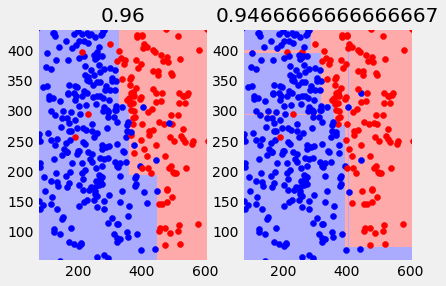

In [4]:

# With depth limits.
plti = plt.subplot(1, 2, 1)
treeModel(X, y, 3, plti)
# Without depth limits
plti = plt.subplot(1, 2, 2)
treeModel(X, y, None, plti)
plt.show()
